# ПРОЕКТНАЯ РАБОТА

# Описание проекта

## Основная задача:

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты для увеличения выручки интернет-магазина.


# Часть 1. Приоритизация гипотез.

Задачи:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста

Задача:
Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Описание данных

Данные для первой части:

Файл /datasets/hypothesis.csv. 

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Шаг 1. Загрузка данных и подготовка их к анализу

### Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
hypothesis = pd.read_csv('./hypothesis.csv')
orders = pd.read_csv('./orders.csv') 
visitors = pd.read_csv('./visitors.csv')

In [3]:
pd.set_option('display.max_colwidth', 1)
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Исходя из первичного анализа, вижу, что во второй и третьей таблицах наблюдается неправильный тип данных для столбцов date.
Также я бы перевела все столбцы в единый регистр.

### Предобработка данных

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [7]:
orders = orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Привела все столбцы к единому регистру для более удобной работы с данными.

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Привела все указанные выше столбцы к нужному типу данных.

Судя по данным из info в таблицах отсутствуют пропущенные данные.

In [10]:
hypothesis[hypothesis.duplicated()]

,hypothesis,reach,impact,confidence,efforts


In [11]:
orders[orders.duplicated()]

,transaction_id,visitor_id,date,revenue,group


In [12]:
visitors[visitors.duplicated()]

,date,group,visitors


In [13]:
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

В тесте находится две группы А и В, количество пользователей в которых отличается - в группе И на 83 пользователя больше.

In [14]:
print(f"Min date {orders['date'].min()}")
print(f"Max date {orders['date'].max()}")

Min date 2019-08-01 00:00:00
Max date 2019-08-31 00:00:00


Анализируются данные с 1 по 31 августа 2019 года.

In [15]:
visitorGroups = orders.groupby('visitor_id')['group'].nunique().reset_index()
visitorGroups = visitorGroups[visitorGroups['group']>1]
len(visitorGroups)

58

Всего существует 58 пользователей, заказы которых присутствуют и в группе А и в группе В. Не будем исключать их в предварительном анализе, но в дальнейшем отнесем таких пользователей к аномальным.

# В рамках данного шага были проделаны следующие действия:

- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов.
- Названия колонок всех таблиц приведены к "змеиному" регистру.
- Преобразованы типы столбцов, связанные с датами.

## Шаг 2. Часть 1. Приоритизация гипотез

In [16]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [17]:
print((hypothesis[['hypothesis','ICE', 'RICE']]).sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

Фреймворк <i>ICE</i> состоит из 3 компонент:

<b>Impact</b> — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

<b>Confidence</b> — насколько вы уверены, что это изменение повлияет на пользователей именно так;

<b>Efforts</b> — сколько стоит протестировать эту гипотезу.

При использовании фреймфорка <i>ICE</i> приоритет отдается гипотезам с высокими значениями Impact и Confidence и средним значениям Efforts.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [18]:
print((hypothesis[['hypothesis','ICE', 'RICE']]).sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

Фреймворк <i>RICE</i> состоит из 4 компонентов:

<b>Reach</b> — скольких пользователей затронет изменение, которое вы хотите внести;

<b>Impact</b> — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

<b>Confidence</b> — насколько вы уверены, что это изменение повлияет на пользователей именно так;

<b>Efforts</b> — сколько стоит протестировать эту гипотезу.

В отличии от фреймворка <i>RICE</i> здесь учитывается еще количество пользователей, которых затронет изменение.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

- Стоит отметить, что в целом, независимо от фреймфорка можно выделить группу слабоприоритетных гипотез - гипотезы с индентификаторами 1,3,5,4 - они занимают 4 последних места в приоритетности гипотез. В прочих гипотезах приоритет изменяется сильнее.
- Наиболее приоритетная гиоптеза по ICE сместилась на 5 место (гипотеза с идентификатором 8), т.к. она затрагивала наименьшее число пользователей - 1. 
- Наиболее приоритетная гипотеза по RICE была на 3м месте по ICE. Ее приоритет вырос, т.к. она затрагивает наибольшее возможное количество пользователей - 10.

# Вывод по данному шагу:

Приоритетность предложенных гипотез можно определять фреймворками ICE и RICE. В зависимости от учета влияния количества пользователей, затрагиваемых той или иной гипотезой, их приоритетность меняется. При этом, независимо от фреймворка выделяется группа низкоприоритетных гипотез.

Ключевое различие фреймворков ICE и RICE состоит в том, что RICE также прямо зависит от показателя Reach - количество пользователей, которых затронет предполагаемое изменение. Благодаря этому, гипотезы, имеющие сильное влияние на пользователей, поднимутся в приоритете. Так, в указанном примере, гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" в RICE поднимается на первое место за счет того, что она затрагивает максимальное число пользователей. А низкое значение Reach у гипотезы "Запустить акцию, дающую скидку на товар в день рождения", снижает ее приоритет.

## Шаг 3. Часть 2. Анализ A/B-теста

In [19]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [20]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


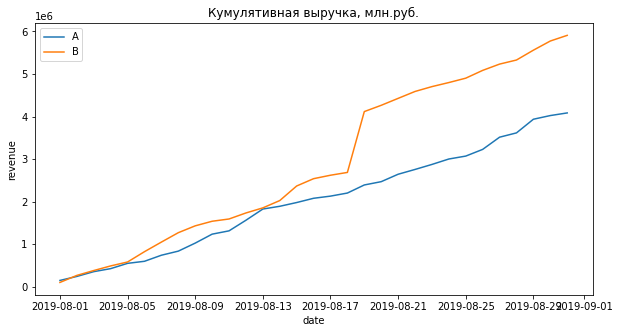

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка, млн.руб.')
plt.xlabel('date')
plt.ylabel('revenue')

plt.legend();

На данном графике можно увидеть, что кумулятивная выручка по группе B держится на одном уровне с выручкой по группе A, немного превышая ее, примерно до середины периода, после чего происходит резкий скачок, после которого скорость роста возвращается на прежний уровень. 
Пока что это дает мало информации о различиях между групп, но следует обратить внимание на скачок, приходящийся на 19 августа 2019 года.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

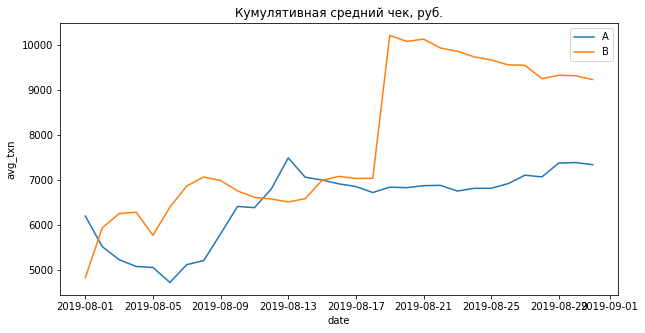

In [23]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивная средний чек, руб.')
plt.xlabel('date')
plt.ylabel('avg_txn')

plt.legend();

На графике кумулятивного среднего чека по группам можно увидеть, что средние чеки групп А и В до 19 августа колеблются относительно друг друга, однако сохраняются на одном уровне. Большую часть периода средний чек группы В выше чем средний чек группы А, за исключением короткого периода с 11 по 14 число, когда группа А достигла своего пика. Но 19 числа происходит скачок, аналогичный графику кумулятивной выручки. Но после этого скачка кумулятивный средний чек группы В равномерно уменьшается. Можно предположить, что в будущем она достигнет уровня А (который медленно растет).

На данный момент можно предположить, что 19 числа произошла покупка с аномально большой суммой, которая повлияла на общую выручку группы В, однако после этого объем потребления вернулся на прежний уровень.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

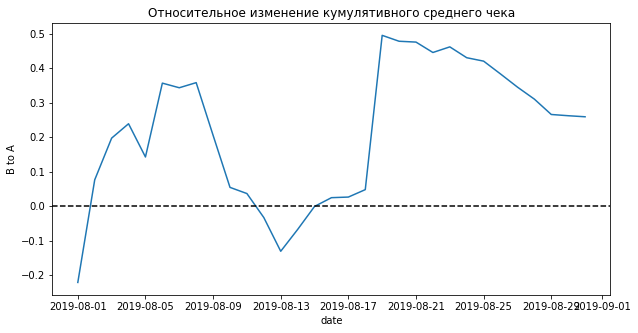

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('date')
plt.ylabel('B to A')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Кумулятивный средний чек группы В обычно всегда больше, чем у группы А (за исключением первого дня и короткого периода с 11 по 14 число). Максимальное изменение составляет 50% после скачка и 40% до него. Скачок 19 числа и последующее снижение отображается и здесь. В дальнейшем стоит обратить внимание и на период 11-14 число.

Промежуточные выводы относительно отличий групп А и групп В.
- Пользователи категории В совершают покупки с большим чеком, чем пользователи категории А.
- На категории А случился небольшой рост в 11-14 числах августа.
- На категории В случился резкий скачок 19 числа, после которого вернулась прежняя динамика.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

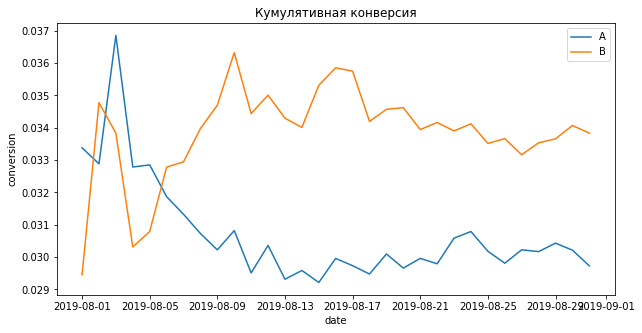

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия')
plt.xlabel('date')
plt.ylabel('conversion')

plt.legend();

На первый взгляд, кумулятивные конверсии групп А и В значительно отличаются. Однако максимальное различие между ними составляет всего 0,7%, что позволяет на данном этапе говорить об отсутствии статистически значимого различия между конверсиями групп А и В. Но все же стоит отметить, что конверсия группы А набрала свой пик в самом начале периода, потом резко уменьшилась и сохраняла уровень до конца периода. Конверсия группы В в свою очередь набрала свой пик уже после падения группы А и после этого начала медленно уменьшаться, при этом превосходя конверсию группы А.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

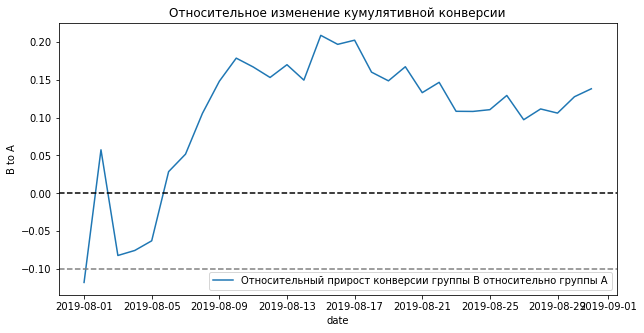

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии')
plt.xlabel('date')
plt.ylabel('B to A');

Конверсия группы В устойчиво превосходит конверсию группы А на 10-20% на всем периоде, кроме первых пары дней. Средние конверсии групп из-за резких перепадов в начале периода практически не отличаются.

Предварительно можно предположить, что группа В лучше группы А. за счет лучших выручки и среднего чека на периоде до 19 числа и конверсии на всем периоде (показатели кумулятивных выручки и среднего чека не показательны после 19 числа за счет потенциальной аномальной продажи 19 августа).

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

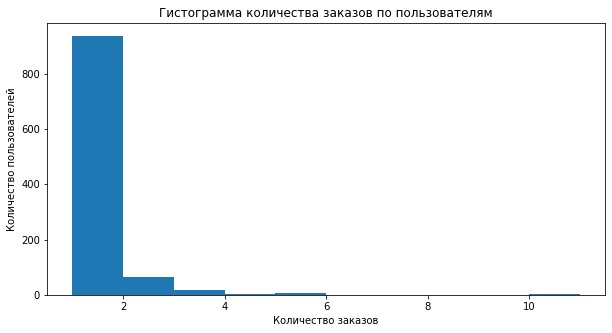

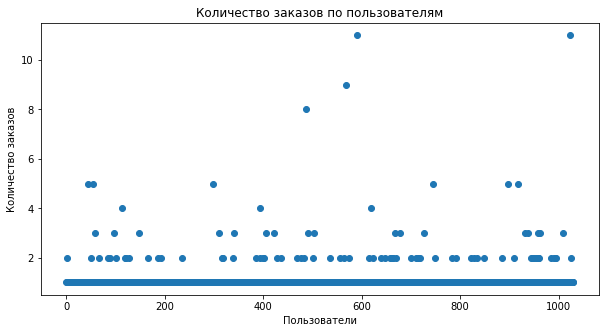

In [27]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders'], bins=10) 

plt.title('Гистограмма количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show();

plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Большая часть пользователей совершила всего 1 заказ. При этом существуют пользователи, совершившие свыше 10 заказов. На основе графиков можно предположить, что пользователи совершившие свыше 6 заказов могут считататься аномальными.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Значения 95% и 99% процентилей еще больше ограничивают наше предположение о границе - аномальными можно считать пользователей, сделавшие уже свыше 4 заказов. Будем использовать это ограничение в дальнейшем.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

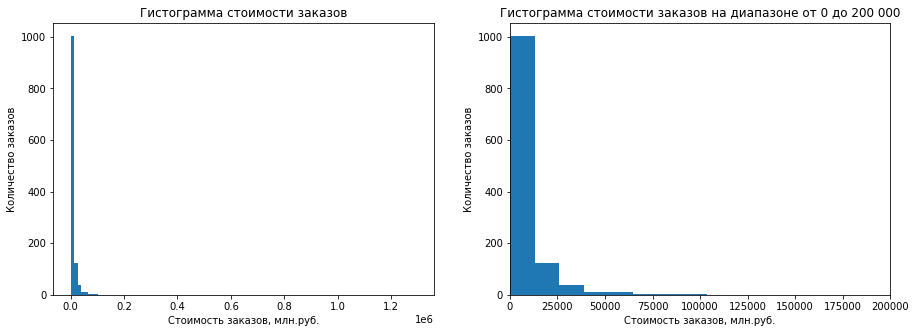

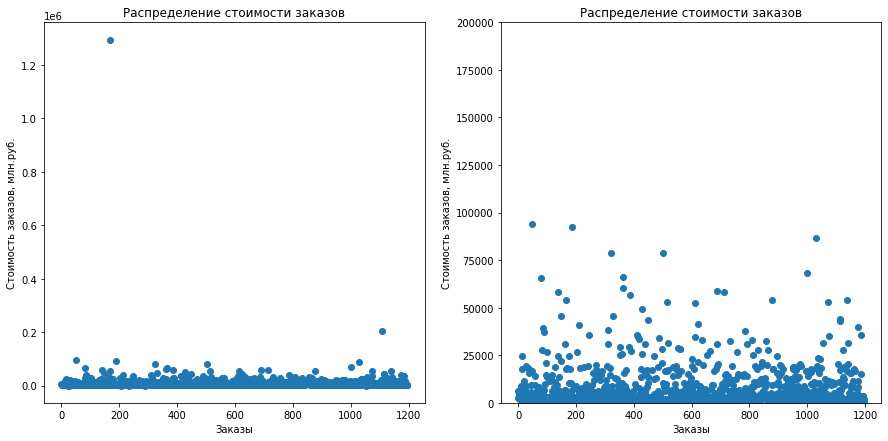

In [29]:
revenueByOrders = (
    orders.groupby('transaction_id', as_index=False)
    .agg({'revenue': 'sum'})
)

revenueByOrders.columns = ['orderId', 'revenue']

x_values = pd.Series(range(0,len(revenueByOrders)))

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].hist(revenueByOrders['revenue'], bins=100) 

axs[0].set_title('Гистограмма стоимости заказов')
axs[0].set_xlabel('Стоимость заказов, млн.руб.')
axs[0].set_ylabel('Количество заказов')

axs[1].set_xlim((0,200000))
axs[1].hist(revenueByOrders['revenue'], bins=100) 

axs[1].set_title('Гистограмма стоимости заказов на диапазоне от 0 до 200 000')
axs[1].set_xlabel('Стоимость заказов, млн.руб.')
axs[1].set_ylabel('Количество заказов')
plt.show();

fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=False)

axs[0].scatter(x_values, revenueByOrders['revenue']) 
axs[0].set_title('Распределение стоимости заказов')
axs[0].set_xlabel('Заказы')
axs[0].set_ylabel('Стоимость заказов, млн.руб.')

axs[1].set_ylim((0,200000))
axs[1].scatter(x_values, revenueByOrders['revenue']) 
axs[1].set_title('Распределение стоимости заказов')
axs[1].set_xlabel('Заказы')
axs[1].set_ylabel('Стоимость заказов, млн.руб.')
plt.show();



Подавляющая часть заказов находится в промежутке от 0 до 50 000 судя по точечной диаграмме. Присутствуют заказы и выше этой цифры, но их сравнительно немного. Присутствуют 2 аномалии - заказ более 200 00 и заказ более 1 200 000. В качестве границы можно взять как раз 50 000. 

Возможно, аномальный заказ в 1 200 000 как раз описывает скачок 19 августа для группы B.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
print(np.percentile(revenueByOrders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Судя по значениям перцентилей 95% и 99% определенную нами границу стоит сдвинуть до 58 233.2. 

В качестве аномалии будем определять не отдельные заказы, а пользователей целиком - пользователей, совершивших более 4 заказов или пользователей, хотя бы один заказ которых был больше 58 233,2. Сформируем список пользователей, данные по которым будут исключаться.

In [31]:
users_abnormal = pd.concat([ordersByUsers.loc[ordersByUsers['orders']>4, 'userId'], 
                           orders.loc[orders['transaction_id'].isin(revenueByOrders.loc[revenueByOrders['revenue']>58233.2,'orderId']), 'visitor_id'].drop_duplicates(),
                           visitorGroups['visitor_id']], axis=0).drop_duplicates().reset_index(drop=True)

In [32]:
users_abnormal

0     199603092 
1     237748145 
2     1230306981
3     2038680547
4     2378935119
         ...    
62    3972127743
63    3984495233
64    4069496402
65    4120364173
66    4186807279
Length: 67, dtype: int64

In [33]:
print('Доля исключенных пользователей {0:.3f}%'.format(len(users_abnormal)/orders['visitor_id'].nunique()*100))

Доля исключенных пользователей 6.499%


Всего получилось 67 таких пользователей. Это составляет 6,5% от общего числа пользователей. Исключение подобной доли пользователей не должно оказать значимого влияния на статистику.

Для первоначальной оценки качества исключения аномалий построим график кумулятивной выручки.

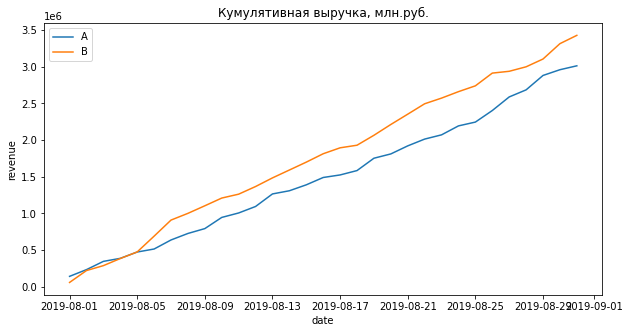

In [34]:
ordersClear = orders[~orders['visitor_id'].isin(users_abnormal)]

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: ordersClear[np.logical_and(ordersClear['date'] <= x['date'], ordersClear['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка, млн.руб.')
plt.xlabel('date')
plt.ylabel('revenue')

plt.legend();

Как и предполагалось, исключений аномальных пользователей убрало резкий скачок в выручке 19 августа.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Прежде всего подготовим датасет с сырыми данными с агрегацией до даты-группы. А затем найдём относительные различия в конверсии и среднем чеке между группами на сырых данных.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left'))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0,)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0,)


В качестве нулевой гипотезы примем утверждение, что значительных различий в конверсии на сырых данных в группах А и В нет. Альтернативная гипотеза будет говорить о наличии этих различий в конверсии на сырых данных.

В качестве статистического критерия для проверки нашей гипотезы на сырых данных используем критерий Манна-Уитни, так как этот тест помимо учёта выбросов и ненормальности распределения, учитывает ещё и уникальность покупки.

В качестве уровня значимости возьмем p-value = 0.05.

In [36]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное изменение {0:.3f}%".format((sampleB.mean() / sampleA.mean() - 1)*100))

p-value 0.017
Относительное изменение 13.808%


Первое число p-value = 0.017 меньше 0.05. Значит, альтернативную гипотезу о наличии различий в конверсии между сырыми данными., не отвергаем. Относительный проигрыш группы B на сырых данных равен 13,8% — второе число в выводе.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

В качестве нулевой гипотезы примем утверждение, что значительных различий в среднем чеке на сырых данных между группами А и В нет. Альтернативная гипотеза будет говорить о наличии этих различий в конверсии на сырых данных.

В качестве статистического критерия для проверки нашей гипотезы на сырых данных используем критерий Манна-Уитни, так как этот тест помимо учёта выбросов и ненормальности распределения, учитывает ещё и уникальность покупки.

В качестве уровня значимости возьмем p-value = 0.05.


In [37]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение {0:.3f}%'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100)) 

p-value 0.729
Относительное изменение 25.871%


Первое число p-value = 0.729 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Относительный выигрыш группы B равен 25,87% — второе число в выводе.

На основании неочищенных данных можно сделать следующие выводы:
- Присутствуют статистические значимые различия в конверсии между группами A и B. На графиках мы видим явное превосходство В, а также различия в динамике между конверсиями групп А и В. Лишним доказательством этому является тот факт, что средняя конверсия B больше чем средняя конверсия А на 25,87%.
- Статистически значимых различий в среднем чеке между группами A и B нет. Средний чек B на 26% больше чем средний чек А, но следует помнить, что из данных еще не исключены аномалии.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Прежде всего подготовим датасет с очищенными данными с агрегацией до даты-группы. А затем найдём относительные различия в конверсии и среднем чеке между группами.

In [38]:
ordersClear = orders[~orders['visitor_id'].isin(users_abnormal)]
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = (visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left'))

ordersByUsersA = (
    ordersClear[ordersClear['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    ordersClear[ordersClear['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(users_abnormal) - len(ordersByUsersA['orders'])), name='orders')], axis=0,)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(users_abnormal) - len(ordersByUsersB['orders'])), name='orders')], axis=0,)

В качестве нулевой гипотезы примем утверждение, что значительных различий в конверсии на очищенных данных в группах А и В нет. Альтернативная гипотеза будет говорить о наличии этих различий в конверсии между группами А и В на очищенных данных.

В качестве статистического критерия для проверки нашей гипотезы на очищенных данных используем критерий Манна-Уитни, так как этот тест помимо учёта выбросов и ненормальности распределения, учитывает ещё и уникальность покупки.

В качестве уровня значимости возьмем p-value = 0.05.

In [39]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное изменение {0:.3f}%".format((sampleB.mean() / sampleA.mean() - 1)*100))

p-value 0.010
Относительное изменение 16.373%


Первое число p-value = 0.010 меньше 0.05. начит, альтернативную гипотезу о наличии различий в конверсии на очищенных данных можно принять. Стоит отметить, что p-value для очищенных данных несколько меньше p-value для неочищенных данных, что говорит о существовании небольшого влияния аномальных данных на значение конверсии. Относительный выигрыш группы B равен 16,4% — второе число в выводе.

Можно сделать вывод, что аномалии повлияли на показатель конверсии в некоторой степени - уменьшение относительного выигрыша группы В относительно группы А.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

В качестве нулевой гипотезы примем утверждение, что значительных различий в среднем чеке на очищенных данных в группах А и В нет. Альтернативная гипотеза будет говорить о наличии этих различий в конверсии между группами А и В на очищенных данных.

В качестве статистического критерия для проверки нашей гипотезы на очищенных данных используем критерий Манна-Уитни, так как этот тест помимо учёта выбросов и ненормальности распределения, учитывает ещё и уникальность покупки.

В качестве уровня значимости возьмем p-value = 0.05.

In [40]:
ordersClear = orders[~orders['visitor_id'].isin(users_abnormal)]
print('p-value {0:.3f}'.format(stats.mannwhitneyu(ordersClear[ordersClear['group']=='A']['revenue'], ordersClear[ordersClear['group']=='B']['revenue'])[1]))
print('Относительное изменение {0:.3f}%'.format((ordersClear[ordersClear['group']=='B']['revenue'].mean()/ordersClear[ordersClear['group']=='A']['revenue'].mean()-1)*100)) 

p-value 0.901
Относительное изменение -3.163%


Первое число p-value = 0.901 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет можно принять. Относительный проигрыш группы B равен 3,2% — второе число в выводе.

Исключение аномалий увеличило значение p-value и снизило относительный проигрыш B. Это может говорить о сильном влиянии аномалий на значение среднего чека.

На основании очищенных данных можно сделать следующие выводы:
- Присутствуют статистически значимые различия в конверсии между группами A и B - p-value на сырых данных сотавляет 0,017, на очищенных 0,010.
- Статистически значимых различий в среднем чеке между группами A и B нет - p-value на сырых данных сотавляет 0.729, на очищенных 0.901. Средний чек B после исключения аномальных данных практически не отличается от среднего чека А.

### Примите решение по результатам теста и объясните его. 
Варианты решений: 
 1. Остановить тест, зафиксировать победу одной из групп. 
 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 3. Продолжить тест.

На основании результатов проведенного теста можно принять следующее решение - остановить тест, зафиксировать победу группы В.

Причиной этого служит низкое значение p-value для показателя - конверсии (0,017 для сырых данных, 0,010 для очищенных). Конверсия группы В значимо отличается от конверсии группы А даже после исключения аномальных данных. 

Значения среднего чека не имеют статистически значимых различий (p-value на сырых данных сотавляет 0.729, на очищенных 0.901). Видимые на графиках различия объясняются аномалиями. 

## Шаг 4. Часть 3. Общий вывод

В рамках этапа подготовки были проделаны следующие действия:
- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов.
- Названия колонок всех таблиц приведены к "змеиному" регистру.
- Преобразованы типы столбцов, связанные с датами.

На этапе анализа приоритетов гипотез с использованием разных фреймворков можно сделать следующий вывод:
- Приоритетность предложенных гипотез можно определять фреймворками ICE и RICE. В зависимости от учета влияния количства пользователей, затрагиваемых той или иной гипотезой, их приоритетность меняется. При этом, независимо от фреймворка выделяется группа низкоприоритетных гипотез.

Результаты A/B тестирования показали следующие результаты:
- На основании результатов проведенного теста можно принять следующее решение - остановить тест, зафиксировать победу группы В.
- Причиной этого служит низкое значение p-value для показателя - конверсии (0,017 для сырых данных, 0,010 для очищенных). Конверсия группы В значимо отличается от конверсии группы А даже после исключения аномальных данных. 
- Значения среднего чека не имеют статистически значимых различий (p-value на сырых данных сотавляет 0.729, на очищенных 0.901). Видимые на графиках различия объясняются аномалиями. 
